# 16. Semantic segmentation: Github resources

Whenever one desires to try out some advanced technique not yet available as a nicely packaged tool like scikit-image, the best solution is to first search for open-source code that approximates what one wants to do. One of the main repositories of such code is [Github](https://github.com/). As an examples, we will here do semantic segmentation, i.e. segmenting objects in an image.

In [7]:
import sys
import numpy as np
import skimage
from matplotlib import pyplot as plt

## 16.1 Finding and exploring a repository

Let's have a look at [this repository](https://github.com/bonlime/keras-deeplab-v3-plus). 

## 16.2 Installing

We follow the instructions as given. We first check what version of tensorflow we have:

In [1]:
import tensorflow

In [3]:
tensorflow.__version__

'1.12.0'

So we have to follow the second set of instructions. These are unix type commands that we would normally type in a terminal. As Jupyter support bash commands we can also do it right here:

In [ ]:
%%bash
git clone https://github.com/bonlime/keras-deeplab-v3-plus/
cd keras-deeplab-v3-plus/
git checkout 714a6b7d1a069a07547c5c08282f1a706db92e20


# 16.3 Making the package accessible

Since we only want to try out the package, we will simply add it's path to our current path. If we try multiple packages, this avoid over-crowding the conda environement with useless code. If we want to use it "in production" we can always install it later.

In [6]:
sys.path.append('/home/jupyter-witz_admin/keras-deeplab-v3-plus/')

Now we can finally import the package:

In [8]:
from model import Deeplabv3

Using TensorFlow backend.


## 16.4 Using the network

We simply follow the instructions given in the repository to run the code. We only modify the image importation as we use a different package (skimage). As always there are some parameters set for pre-processing:

In [9]:
trained_image_width=512 
mean_subtraction_value=127.5

Then we can pick the image of our choice:

In [10]:
image = skimage.io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Cow_female_black_white.jpg/1920px-Cow_female_black_white.jpg')
#image = skimage.io.imread('/home/jupyter-witz_admin/keras-deeplab-v3-plus/imgs/image1.jpg')
#image = skimage.io.imread('/home/jupyter-witz_admin/Data2/twocats.JPG')
#image = skimage.io.imread('https://upload.wikimedia.org/wikipedia/commons/1/1e/Namibie_Etosha_Girafe_04.jpg')
#image = skimage.io.imread('https://cdn12.picryl.com/photo/2016/12/31/cow-browse-ruminating-e81314-1024.jpg')
#image = skimage.io.imread('https://upload.wikimedia.org/wikipedia/commons/3/33/Chat-affut.JPG')
#image = skimage.io.imread('https://upload.wikimedia.org/wikipedia/commons/1/18/TrailKitty.jpg')#kat+bike
#image = skimage.io.imread('https://live.staticflickr.com/5680/21581405706_1091f18dfd_b.jpg')#horse+kid
image = image.astype('float')


And run the remaining of the proposed code:

In [11]:
# resize to max dimension of images from training dataset
w, h, _ = image.shape
ratio = float(trained_image_width) / np.max([w, h])
resized_image = skimage.transform.resize(image,(int(ratio * w),int(ratio * h)))
#resized_image = np.array(Image.fromarray(image.astype('uint8')).resize((int(ratio * h), int(ratio * w))))

# apply normalization for trained dataset images
resized_image = (resized_image / mean_subtraction_value) - 1.

# pad array to square image to match training images
pad_x = int(trained_image_width - resized_image.shape[0])
pad_y = int(trained_image_width - resized_image.shape[1])
resized_image = np.pad(resized_image, ((0, pad_x), (0, pad_y), (0, 0)), mode='constant')

# make prediction
deeplab_model = Deeplabv3()
res = deeplab_model.predict(np.expand_dims(resized_image,0))
labels = np.argmax(res.squeeze(), -1)


/opt/tljh/user/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/tljh/user/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Since we padded and reshaped the image in the pre-processing step, we have now to correct the size of the output labels:

In [12]:
if pad_x > 0:
    labels = labels[:-pad_x,:]
if pad_y > 0:
    labels = labels[:, :-pad_y]
labels = skimage.transform.resize(labels,(w, h),preserve_range=True, order=0)


## 16.5 Checking the output

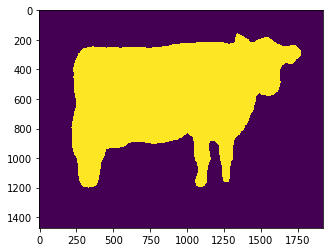

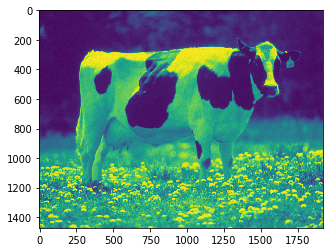

In [14]:
plt.imshow(labels)
plt.show()
plt.imshow(image[:,:,0])
plt.show()

In [15]:
class_names = np.array(['background','aeroplane', 'bicycle', 'bird', 'boat',
                      'bottle', 'bus', 'car', 'cat', 'chair',
                      'cow', 'diningtable', 'dog', 'horse',
                      'motorbike', 'person', 'pottedplant',
                      'sheep', 'sofa', 'train', 'tvmonitor'])

In [16]:
class_names[np.unique(labels).astype(int)]

array(['background', 'cow'], dtype='<U11')